In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("..") 
import src 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)
../src/plots/env.py:42: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]


In [21]:
def setup_cc_axis(): 
    r""" 
    Setup a single subplot to plot CCSN yields as a function 
    of metallicity on. 
    """ 
    fig = plt.figure(figsize = (14, 7), facecolor = "white") 
    ax1 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122) 
    ax1.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
    ax2.set_xlabel(r"$\log_{10} (Z / Z_\odot)$") 
    ax1.set_ylabel(r"$y_\text{N}^\text{CC}$") 
    ax2.set_ylabel(r"$\log_{10}\text{(N/O)}_\text{CC}$") 
    ax1.set_yscale("log") 
    ax1.set_xlim([-3.4, 0.8]) 
    ax2.set_xlim([-3.4, 0.8]) 
    ax1.set_ylim([3.e-7, 3.e-2]) 
    ax2.set_ylim([-4.4, -0.6]) 
    ax2.yaxis.set_ticks([-4, -3, -2, -1]) 
    return [ax1, ax2] 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: ScienceWarning: Supernovae yields from the Nomoto, Kobayashi & Tominaga (2013), ARA&A, 51, 457 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this m

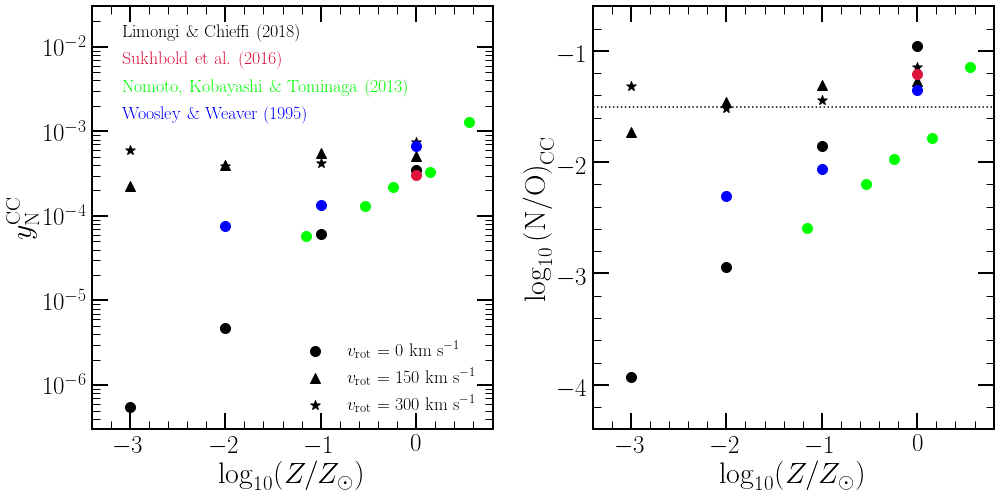

In [26]:
studies = ["LC18", "S16/W18", "NKT13", "WW95"] 
names = {
    "LC18": "Limongi \& Chieffi (2018)", 
    "NKT13": "Nomoto, Kobayashi \& Tominaga (2013)", 
    "S16/W18": "Sukhbold et al. (2016)", 
    "WW95": "Woosley \& Weaver (1995)" 
}
metallicities = {
    "LC18": [-3, -2, -1, 0], 
    "NKT13": [-1.15, -0.54, -0.24, 0.15, 0.55], 
    "S16/W18": [0], 
    "WW95": [-4, -2, -1, 0] 
} 
rotation = {
    "LC18": [0, 150, 300], 
    "NKT13": [0], 
    "S16/W18": [0], 
    "WW95": [0] 
}
markers = {
    0: "circle", 
    150: "triangle_up", 
    300: "star" 
}
colors = {
    "LC18": "black", 
    "NKT13": "lime", 
    "S16/W18": "crimson", 
    "WW95": "blue" 
}
ax1, ax2 = setup_cc_axis() 
for i in studies: 
    for j in metallicities[i]: 
        for k in rotation[i]: 
            kwargs = {
                "c": plots.mpltoolkit.named_colors()[colors[i]], 
                "marker": plots.mpltoolkit.markers()[markers[k]], 
                "s": 100 
            }
            y_n_cc, _ = vice.yields.ccsne.fractional('n', study = i, MoverH = j, rotation = k) 
            y_o_cc, _ = vice.yields.ccsne.fractional('o', study = i, MoverH = j, rotation = k) 
            cc_ratio = np.log10(y_n_cc / y_o_cc) - np.log10(14.007 / 15.999) 
            ax1.scatter(j, y_n_cc, **kwargs)
            ax2.scatter(j, cc_ratio, **kwargs) 
ax2.plot(ax2.get_xlim(), 2 * [-1.5], c = plots.mpltoolkit.named_colors()["black"], 
    linestyle = ':') 
            
lines = len(studies) * [None] 
for i in range(len(lines)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[studies[i]]], 
        "label": names[studies[i]] 
    }
    lines[i] = ax1.plot([0, 0], [1, 1], **kwargs)[0] 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), fontsize = 18, ncol = 1, 
    frameon = False, handlelength = 0) 
ax1.add_artist(leg) 
for i in range(len(lines)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
    leg.legendHandles[i].set_visible(False) 
    lines[i].remove() 
points = len(rotation["LC18"]) * [None] 
for i in range(len(points)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()["black"], 
        "marker": plots.mpltoolkit.markers()[markers[rotation["LC18"][i]]], 
        "label": r"$v_\text{rot}$ = %g km s$^{-1}$" % (rotation["LC18"][i]), 
        "s": 100 
    } 
    points[i] = ax1.scatter([0, 0], [1, 1], **kwargs) 
ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), fontsize = 18, ncol = 1, 
    frameon = False) 
for i in range(len(points)): 
    points[i].remove() 

plt.tight_layout() 
plt.subplots_adjust(wspace = 0.25)
for ext in ["pdf", "png"]: plt.savefig("n_cc_yields.%s" % (ext)) 

In [11]:
def setup_axes(logprefactor = 3): 
    r""" 
    Setup 3 subplots to plot AGB yields as a function of progenitor mass 
    and metallicity on. 
    """ 
    fig = plt.figure(figsize = (21, 7), facecolor = "white") 
    ax1 = fig.add_subplot(131) 
    ax2 = fig.add_subplot(132) 
    ax3 = fig.add_subplot(133) 
    for ax in [ax1, ax2, ax3]: 
        ax.set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
        ax.set_xlim([0.8, 6.8]) 
        ax.set_xticks(range(1, 7)) 
    ax3.set_xlim([0.8, 7.8]) 
    ax3.set_xticks(range(1, 8)) 
    ax1.set_ylabel(r"N Fractional Yield [$\times10^{-%d}$]" % (logprefactor))
    ax1.set_ylim([-0.2, 2.5]) 
    ax2.set_ylim([-1, 14]) 
    ax3.set_ylim([-0.5, 9.5])
    ax1.set_yticks([0, 1, 2]) 
    ax2.set_yticks([0, 2, 4, 6, 8, 10, 12])
    return [ax1, ax2, ax3] 

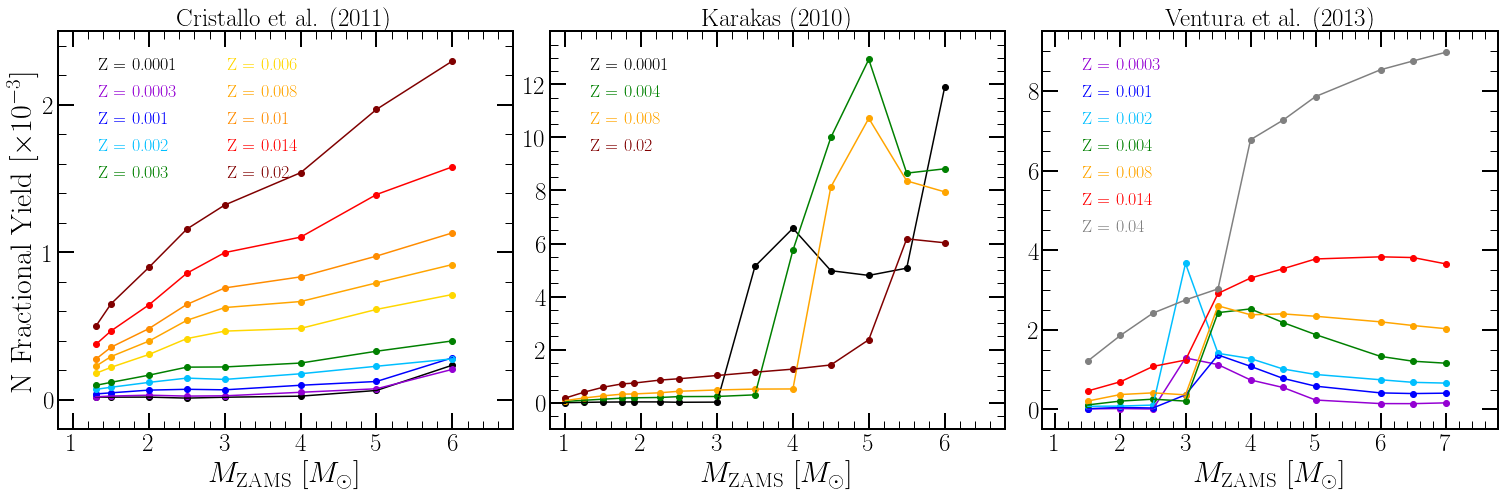

In [13]:
logprefactor = 3 
ax1, ax2, ax3 = setup_axes(logprefactor = logprefactor) 
ax1.set_title("Cristallo et al. (2011)", fontsize = 25) 
ax2.set_title("Karakas (2010)", fontsize = 25) 
ax3.set_title("Ventura et al. (2013)", fontsize = 25) 
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "green", "orange", "maroon"], 
    "ventura13": ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"] 
}
y, m, z = vice.yields.agb.grid('n') 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["cristallo11"][i]] 
    }
    ax1.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax1.plot(m, yields, **kwargs) 
leg = ax1.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 2, frameon = False, 
    fontsize = 18, handlelength = 0, bbox_to_anchor = (0.02, 0.98)) 
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["cristallo11"][i]) 
    leg.legendHandles[i].set_visible(False) 

y, m, z = vice.yields.agb.grid('n', study = "karakas10") 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["karakas10"][i]] 
    } 
    ax2.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax2.plot(m, yields, **kwargs) 
leg = ax2.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, frameon = False, 
    fontsize = 18, handlelength = 0, bbox_to_anchor = (0.02, 0.98))  
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["karakas10"][i]) 
    leg.legendHandles[i].set_visible(False) 
    
y, m, z = vice.yields.agb.grid('n', study = "ventura13") 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["ventura13"][i]] 
    } 
    ax3.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax3.plot(m, yields, **kwargs) 
leg = ax3.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, frameon = False, 
    fontsize = 18, handlelength = 0, bbox_to_anchor = (0.02, 0.98)) 
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["ventura13"][i]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_agb_yields.%s" % (ext)) 

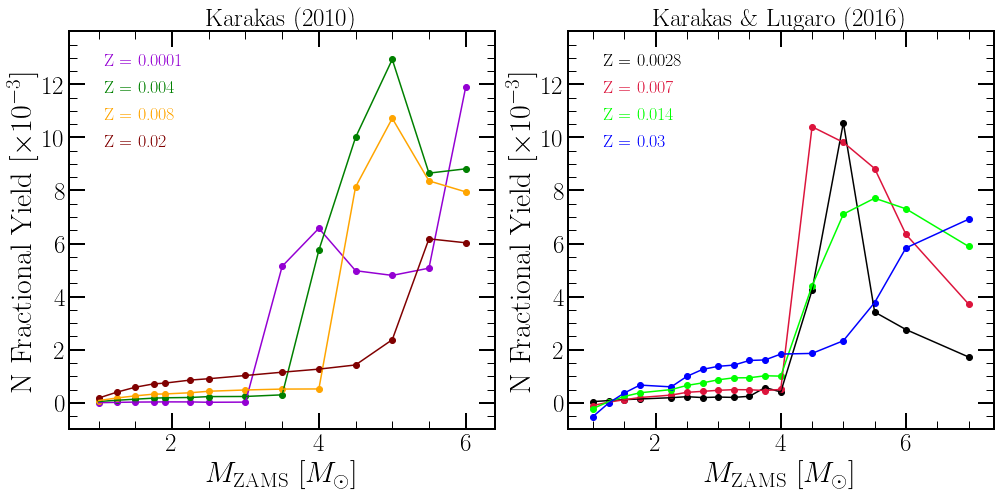

In [13]:
logprefactor = 3 
colors = {
    "karakas10": ["darkviolet", "green", "orange", "maroon"], 
    "karakas16": ["black", "crimson", "lime", "blue"] 
}
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122) 
for ax in [ax1, ax2]: 
    ax.set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
    ax.set_ylabel(r"N Fractional Yield [$\times10^{-%d}$]" % (logprefactor)) 
    ax.set_ylim([-1, 14]) 
    ax.set_yticks(range(0, 14, 2)) 
ax1.set_xlim([0.6, 6.4]) 
ax2.set_xlim([0.6, 7.4]) 
ax1.set_title("Karakas (2010)", fontsize = 25) 
ax2.set_title("Karakas \& Lugaro (2016)", fontsize = 25) 

legend_kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 18, 
    "handlelength": 0, 
    "bbox_to_anchor": (0.01, 0.99) 
} 

y, m, z = vice.yields.agb.grid("n", study = "karakas10") 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["karakas10"][i]] 
    } 
    ax1.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax1.plot(m, yields, **kwargs) 
leg = ax1.legend(**legend_kwargs) 
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["karakas10"][i]) 
    leg.legendHandles[i].set_visible(False) 
    
y, m, z = vice.yields.agb.grid("n", study = "karakas16") 
for i in range(len(z)): 
    yields = [10**logprefactor * _[i] for _ in y] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors["karakas16"][i]] 
    } 
    ax2.scatter(m, yields, **kwargs) 
    kwargs["label"] = "Z = %g" % (z[i]) 
    ax2.plot(m, yields, **kwargs) 
leg = ax2.legend(**legend_kwargs) 
for i in range(len(z)): 
    leg.get_texts()[i].set_color(colors["karakas16"][i]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 

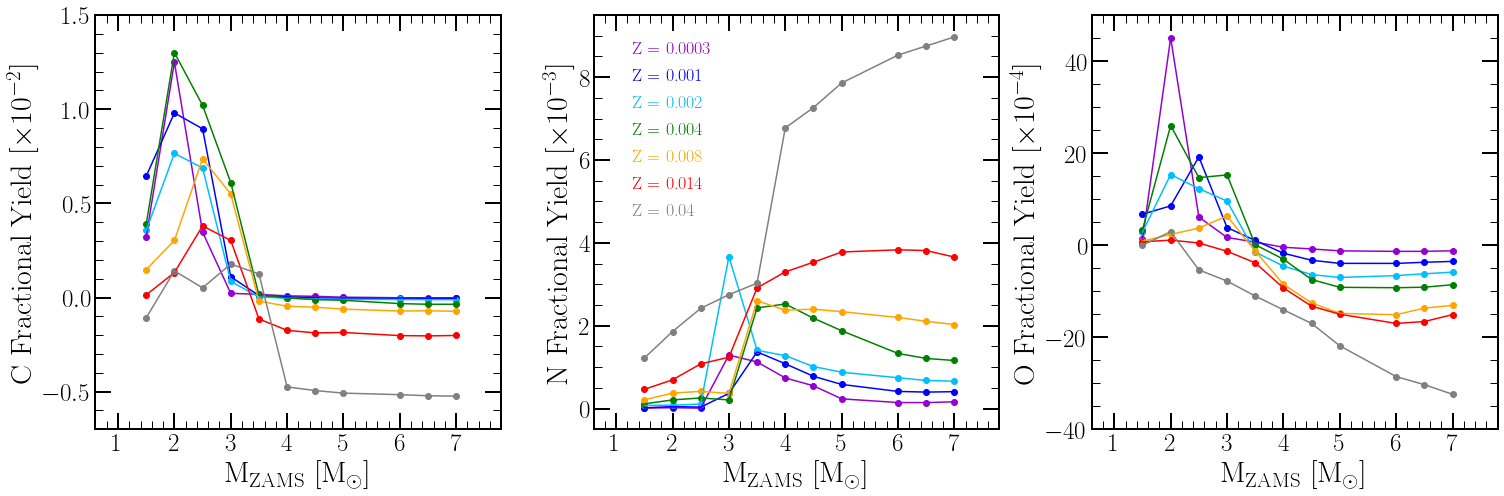

In [16]:
logprefactor = {
    "c": 2, 
    "n": 3, 
    "o": 4 
}
fig = plt.figure(figsize = (21, 7), facecolor = "white") 
axes = [] 
for i in range(3): 
    axes.append(fig.add_subplot(131 + i, facecolor = "white")) 
    axes[i].set_xlabel(r"M$_\text{ZAMS}$ [M$_\odot$]") 
    axes[i].set_ylabel(r"%s Fractional Yield [$\times10^{-%d}$]" % (
        {0: "C", 1: "N", 2: "O"}[i], logprefactor[['c', 'n', 'o'][i]])) 
#     axes[i].set_xlim([0.6, 6.4]) 
#     axes[i].set_xticks(range(1, 7)) 
    axes[i].set_xlim([0.6, 7.8])
    axes[i].set_xticks(range(1, 8)) 
# axes[0].set_ylim([-0.3, 2.3]) 
# axes[1].set_ylim([-1, 14]) 
# axes[2].set_ylim([-15, 5]) 
# axes[2].set_yticks([-14 + 2 * i for i in range(10)])
# axes[0].set_ylim([-0.3, 0.9]) 
# axes[1].set_ylim([-0.2, 3.2]) 
# axes[2].set_ylim([-12, 4]) 
axes[0].set_ylim([-0.7, 1.5]) 
axes[1].set_ylim([-0.5, 9.5]) 
axes[2].set_ylim([-40, 50]) 
# colors = ["black", "crimson", "lime", "blue"] 
# colors = ["black", "darkviolet", "blue", "deepskyblue", "green", 
#     "gold", "orange", "darkorange", "red", "maroon"] 
colors = ["darkviolet", "blue", "deepskyblue", "green", "orange", "red", "grey"] 
elements = ['c', 'n', 'o'] 
for i in range(3): 
    y, m, z = vice.yields.agb.grid(elements[i], study = "ventura13") 
    for j in range(len(z)): 
        yields = [10**logprefactor[elements[i]] * _[j] for _ in y] 
        kwargs = {
            "c": plots.mpltoolkit.named_colors()[colors[j]] 
        } 
        axes[i].scatter(m, yields, **kwargs) 
        if i == 1: kwargs["label"] = "Z = %g" % (z[j]) 
        axes[i].plot(m, yields, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
#     "ncol": 2, 
    "frameon": False, 
    "fontsize": 18, 
    "handlelength": 0, 
    "bbox_to_anchor": (0.02, 0.98) 
} 
leg = axes[1].legend(**kwargs) 
for i in range(len(colors)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("yields/cno_ventura13.%s" % (ext)) 

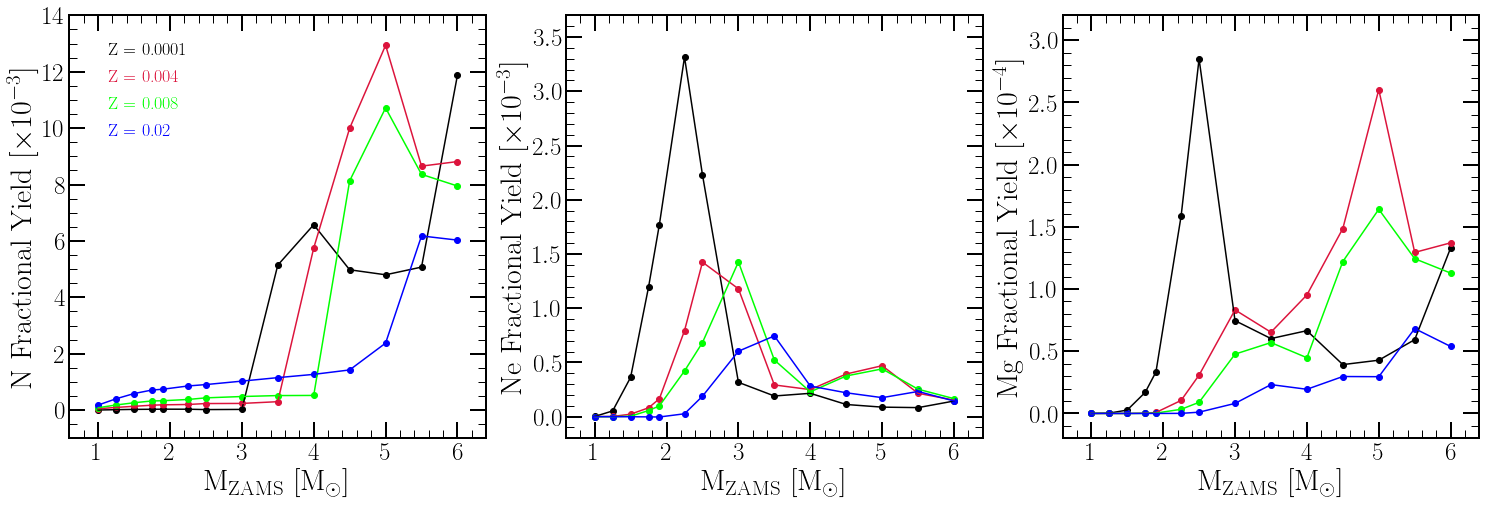

In [24]:
elements = ['n', 'ne', 'mg'] 
logprefactor = {
    "n": 3, 
    "ne": 3, 
    "mg": 4 
}
fig = plt.figure(figsize = (21, 7), facecolor = "white") 
axes = [] 
for i in range(3): 
    axes.append(fig.add_subplot(131 + i, facecolor = "white")) 
    axes[i].set_xlabel(r"M$_\text{ZAMS}$ [M$_\odot$]") 
    axes[i].set_ylabel(r"%s Fractional Yield [$\times10^{-%d}$]" % (
        dict(zip(range(3), elements))[i].capitalize(), logprefactor[elements[i]])) 
    axes[i].set_xlim([0.6, 6.4]) 
    axes[i].set_xticks(range(1, 7))
axes[0].set_ylim([-1, 14]) 
axes[1].set_ylim([-0.2, 3.7]) 
axes[2].set_ylim([-0.2, 3.2]) 
colors = ["black", "crimson", "lime", "blue"] 
for i in range(3): 
    y, m, z = vice.yields.agb.grid(elements[i], study = "karakas10") 
    for j in range(len(z)): 
        yields = [10**logprefactor[elements[i]] * _[j] for _ in y] 
#         yields = [_[j] for _ in y]
        kwargs = {
            "c": plots.mpltoolkit.named_colors()[colors[j]] 
        } 
        axes[i].scatter(m, yields, **kwargs) 
        if not i: kwargs["label"] = "Z = %g" % (z[j]) 
        axes[i].plot(m, yields, **kwargs) 
kwargs = {
    "loc": plots.mpltoolkit.mpl_loc("upper left"), 
    "ncol": 1, 
    "frameon": False, 
    "fontsize": 18, 
    "handlelength": 0, 
    "bbox_to_anchor": (0.02, 0.98) 
} 
leg = axes[0].legend(**kwargs) 
for i in range(len(colors)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
plt.tight_layout() 

In [35]:
def setup_axis(logprefactor = 3): 
    fig = plt.figure(figsize = (7, 7), facecolor = "white")  
    ax = fig.add_subplot(111) 
    ax.set_xlabel(r"$M_\text{ZAMS} [M_\odot]$") 
    ax.set_ylabel(r"N Fractional Yield [$\times10^{-%d}$]" % (logprefactor)) 
    ax.set_ylim([-0.2, 2.5]) 
    ax.set_xlim([0.8, 6.8]) 
    ax.xaxis.set_ticks([1, 2, 3, 4, 5, 6]) 
    ax.yaxis.set_ticks([0, 1, 2]) 
    return ax 

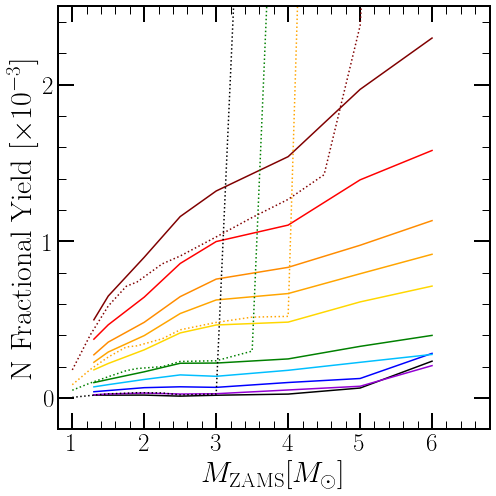

In [37]:
logprefactor = 3
linestyles = {
    "cristallo11": '-', 
    "karakas10": ':' 
}
colors = {
    "cristallo11": ["black", "darkviolet", "blue", "deepskyblue", 
                    "green", "gold", "orange", "darkorange", "red", "maroon"], 
    "karakas10": ["black", "green", "orange", "maroon"] 
}
ax = setup_axis(logprefactor = logprefactor) 
for study in ["cristallo11", "karakas10"]: 
    y, m, z = vice.yields.agb.grid('n', study = study) 
    for i in range(len(z)): 
        yields = [10**logprefactor * _[i] for _ in y] 
        kwargs = {
            "c": plots.mpltoolkit.named_colors()[colors[study][i]], 
            "linestyle": linestyles[study] 
        } 
        ax.plot(m, yields, **kwargs) 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_agb_yields_comp.%s" % (ext)) 

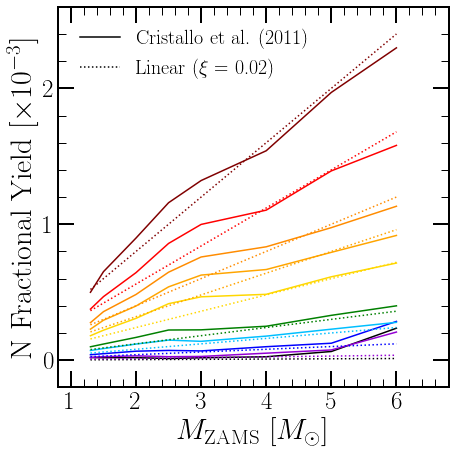

In [14]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel(r"$M_\text{ZAMS}$ [$M_\odot$]") 
ax.set_ylabel(r"N Fractional Yield [$\times10^{-3}$]") 
ax.set_xlim([0.8, 6.8]) 
ax.set_xticks(range(1, 7)) 
ax.set_ylim([-0.2, 2.6]) 
ax.set_yticks(range(3)) 
colors = ["black", "darkviolet", "blue", "deepskyblue", 
    "green", "gold", "orange", "darkorange", "red", "maroon"] 
y, m, z = vice.yields.agb.grid("n", study = "cristallo11") 
linear = src.simulations.yields.linear_agb_yield(slope = 0.02) 
for i in range(len(z)): 
    yields = [1e3 * _[i] for _ in y] 
    kwargs = {"c": plots.mpltoolkit.named_colors()[colors[i]]} 
    if not i: kwargs["label"] = "Cristallo et al. (2011)" 
    ax.plot(m, yields, **kwargs) 
    xvals = list(range(8)) 
    yields = [1e3 * linear(mass, z[i]) for mass in m] 
    kwargs["linestyle"] = ':' 
    if not i: kwargs["label"] = r"Linear ($\xi$ = 0.02)" 
    ax.plot(m, yields, **kwargs) 
ax.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, frameon = False, 
    bbox_to_anchor = (0.01, 0.99), fontsize = 20) 

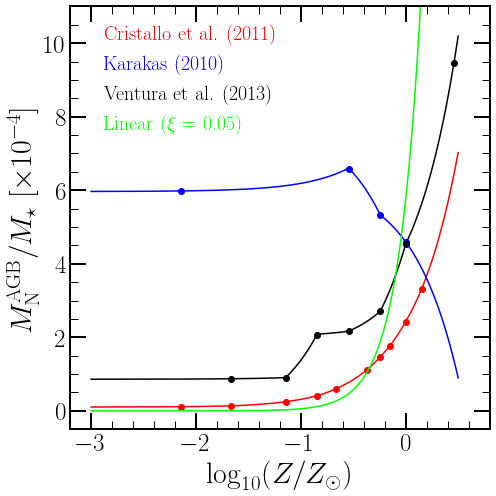

In [16]:
vice.yields.ccsne.settings['n'] = 0 
vice.yields.sneia.settings['n'] = 0 
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel(r"$\log_{10}(Z/Z_\odot)$") 
ax.set_ylabel(r"$M_\text{N}^\text{AGB} / M_\star$ [$\times10^{-4}$]") 
ax.set_xlim([-3.2, 0.8]) 
ax.set_ylim([-0.5, 11.0]) 
MSTAR = 1.e6 
MoverH = [-3 + 0.01 * i for i in range(351)] 
yields = len(MoverH) * [0.] 
studies = ["cristallo11", "karakas10", "ventura13"] 
names = {
    "cristallo11": "Cristallo et al. (2011)", 
    "karakas10": "Karakas (2010)", 
    "ventura13": "Ventura et al. (2013)" 
} 
colors = {
    "cristallo11": "red", 
    "karakas10": "blue", 
    "ventura13": "black" 
}
Zvals = {
    "cristallo11": [0.0001, 0.0003, 0.001, 0.002, 0.003, 0.006, 0.008, 0.01, 0.014, 0.02], 
    "karakas10": [0.0001, 0.004, 0.008, 0.014], 
    "ventura13": [0.0003, 0.001, 0.002, 0.004, 0.008, 0.014, 0.04] 
}
for study in studies: 
    vice.yields.agb.settings['n'] = study 
    for i in range(len(MoverH)): 
        mass, times = vice.single_stellar_population('n', mstar = MSTAR, Z = 0.014 * 10**MoverH[i], time = 13.2)   
        yields[i] = 1.e4 * mass[-1] / MSTAR 
    ax.plot(MoverH, yields, c = plots.mpltoolkit.named_colors()[colors[study]], label = names[study]) 
    reference_points = [np.log10(z / 0.014) for z in Zvals[study]] 
    for x in reference_points: 
        diff = [abs(x - _) for _ in MoverH] 
        idx = diff.index(min(diff)) 
        ax.scatter(x, yields[idx], c = plots.mpltoolkit.named_colors()[colors[study]], 
            marker = plots.mpltoolkit.markers()["circle"]) 
vice.yields.agb.settings['n'] = src.simulations.yields.linear_agb_yield(slope = 0.05) 
for i in range(len(MoverH)): 
    mass, times = vice.single_stellar_population('n', mstar = MSTAR, Z = 0.014 * 100**MoverH[i], time = 13.2) 
    yields[i] = 1.e4 * mass[-1] / MSTAR 
ax.plot(MoverH, yields, c = plots.mpltoolkit.named_colors()["lime"], label = r"Linear ($\xi$ = 0.05)") 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("upper left"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(len(studies)): 
    leg.get_texts()[i].set_color(colors[studies[i]]) 
    leg.legendHandles[i].set_visible(False) 
leg.get_texts()[-1].set_color("lime") 
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_agb_ssp_yields.%s" % (ext)) 